## Understand the business scenario and problem

The HR department at fictional company wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analyst and ask me to provide data-driven suggestions based on my understanding of the data. 

#### They have the following question: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department, discover the reasons and to build a model that predicts whether or not an employee will leave the company. 

## Familiarize with data

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0 - 1]|
last_evaluation|Score of employee's last performance review [0 - 1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

pd.set_option('display.max_columns', None)

## Load dataset

In [3]:
# load dataset into dataframe
df = pd.read_csv(r'C:\Users\MyProfileAdministrator\Desktop\programming\Projects\hr_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Make a table displaying basic information about the dataset

In [4]:
# df.count will create a series-object so i wrapped it with df function since we need a dataframe 
explore = pd.DataFrame(df.count())
# Rename column
explore.columns = ['Total']
# Create number of missing values column
explore['Missing values'] = df.isna().sum()
# Create number of unique values column
explore['Uniques'] = df.nunique()

# Create temporary lists to store values
most_frequent = []
frequency = []
frequency_percents = []
# Iterate through df columns
for i in df.columns:
    # .value_counts() displays the amount of every distinct item in column ordered in descending order
    # Since we need the most frequent value we should use index[0] to grab the value with the highest number of occurrences
    most_frequent.append(df[i].value_counts().index[0])
    # Grab the amount of occurrences of this item
    frequency.append(df[i].value_counts().values[0])
    # Calculate how many percent is this value of the total
    frequency_percents.append(round(df[i].value_counts().values[0] / df[i].count() * 100, 2))

# Create columns using previously created lists
explore['Most frequent'] = most_frequent
explore['Frequency'] = frequency
explore['Frequency percents'] = frequency_percents

# Transpose the df 
explore = explore.transpose()

# Display the df
explore

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
Total,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
Missing values,0,0,0,0,0,0,0,0,0,0
Uniques,92,65,6,215,8,2,2,2,10,3
Most frequent,0.1,0.55,4,135,3,0,0,0,sales,low
Frequency,358,358,4365,153,6443,12830,11428,14680,4140,7316
Frequency percents,2.39,2.39,29.1,1.02,42.96,85.54,76.19,97.87,27.6,48.78


* There are no missing values in dataset.
* The highest number of employees are working on 4 projects at the same time.
* 43% of employees have been working for 3 years in the company.
* 24% of employees left the company.
* Only 2% of employees received promotion for the last 5 years.
* 49% of employees have low salary.

## Rename columns 

In [5]:
# make all columns match snake_case
print(df.columns)
df = df.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                          'Work_accident' : 'work_accident',
                          'Department' : 'department'})
df.head()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Gather basic information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Gather descriptive statistics about the data

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Check for duplicates

In [8]:
# check for duplicates
print(f"Amount of duplicates: {(a:=df.duplicated().sum())}")
print(f"Total amount of rows: {(b:=len(df))}")
print(f"{round(a/b * 100, 2)}% of values in df are duplicates")

Amount of duplicates: 3008
Total amount of rows: 14999
20.05% of values in df are duplicates


In [9]:
# display duplicated rows
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# drop duplicates
df1 = df.drop_duplicates(keep='first')

In [11]:
# make sure duplicated rows are gone
df1.info()
# 11911 entries indicate that duplicates are gone

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Exploratory data analysis

In [12]:
# get numbers of people who left VS stayed in company
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [13]:
# get previous information but in percentes
df1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

In [14]:
# calculate average working time per month
# consider standartized working time 8hrs/day, so 8hrs/day * 5working/days = 40hrs/week, in a year there are about 50 working weeks
# now compute average work time in hrs per month
average_work_time_per_month = round(40 * 50 / 12, 2)
average_work_time_per_month

166.67

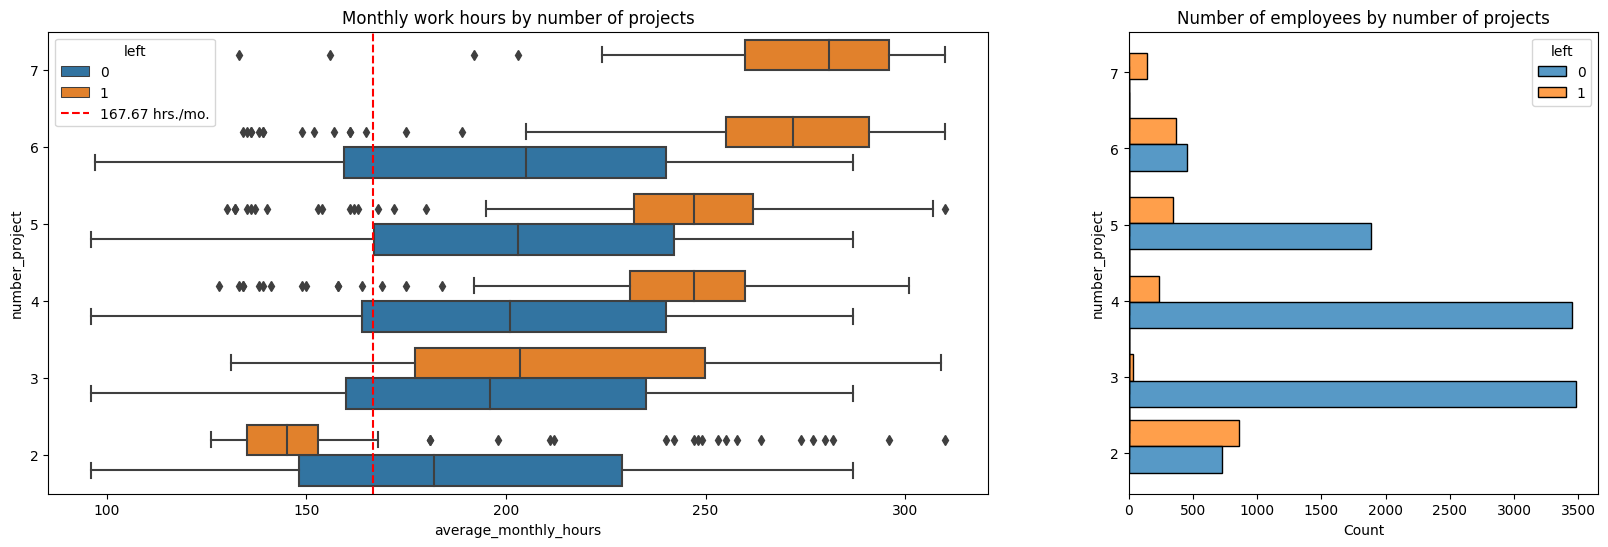

In [15]:
# set figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [2, 1]})

# create boxplot showing average monthly hours distributions for amount of projects employees working on and compare employees who left VS stayed in the company
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=axs[0])

# configure plot for better understanding
axs[0].invert_yaxis()
axs[0].set_title('Monthly work hours by number of projects')
axs[0].axvline(x=average_work_time_per_month, label='167.67 hrs./mo.', ls='--', color='red')
axs[0].legend(title='left')

# create histplot showing number of employees distributions by amount of projects they are working on and compare employees who left VS stayed in the company
sns.histplot(data=df1, y='number_project', hue='left', multiple='dodge', shrink=4, ax=axs[1])

# configure plot
axs[1].set_title('Number of employees by number of projects')

# display the plots
plt.show()


There are 2 conspicuous chunks of people who left the company:
* Employees who left the company with number of projects equal 2 have average monthly working hours lesser than standartized average monthly working hours. These folks might were fired out of the company due to small productivity. it is also possible that they were assigned with lesser amount of work because these employees were already on their way out of the door.
* Employees who left the company with number of projects greater than 3. Those folks have average monthly working hours significantly greater than their peers with the same amount of projects. That is, employees who left the company took on too much work or they were assigned with too much work and left the company due to overworking.

According to the histogram we can see that there are everyone who worked on 7 projects left the company. And interquantile range of this group of people is equal 255-290 working hrs./month. It is the the highest parameter among all groups.

The optimal amount of projects to work on seems to be 3-4 because the ratio left/stayed of the employees are the lowest among all groups.

Aside of those employees with 2 projects who left the company, other groups, even those who stayed, have average monthly working hours higher than the standartized monthly working hours. All groups of employees are overworking to some extent.


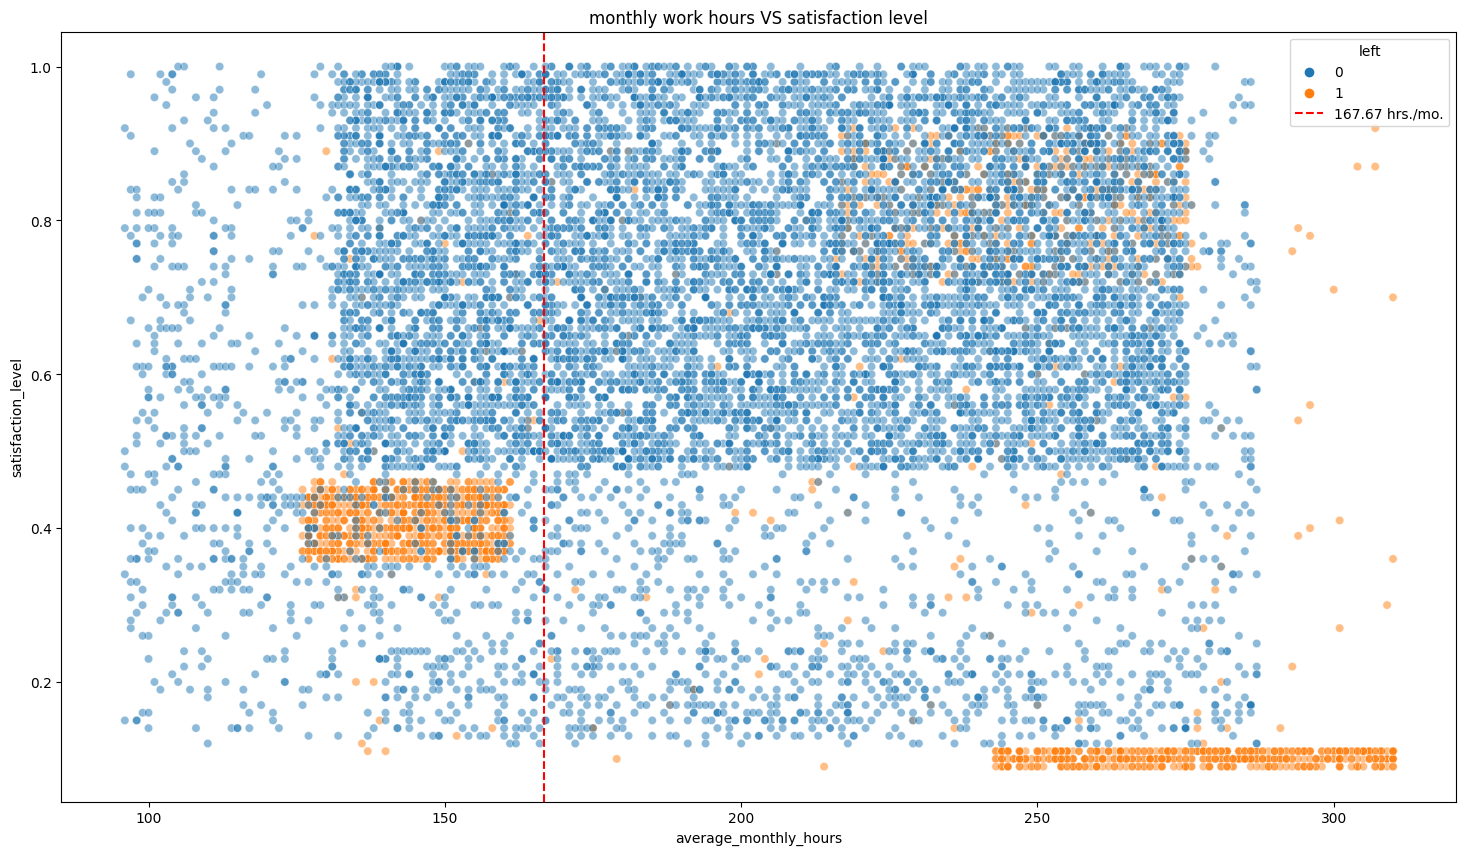

In [16]:
# set figure and exes
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# create scatterplot of satisfaction level VS average monthly work hours of employees and compare employees who left VS stayed in the company
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', ax=ax, alpha=0.5)

# configure the plot
ax.axvline(x=average_work_time_per_month, label='167.67 hrs./mo.', ls='--', color='red')
ax.set_title('monthly work hours VS satisfaction level')
ax.legend(title='left')

# display the plot
plt.show()


The scatterplot above shows that there is a group of people with average monthly working hours in range 240-315. It's about 70 working hours per week for a whole year. It's likely that this is a reason why their satisfaction levels being close to 0.

Also there is a group of people who have average monthly working hours less than normal and their satisfaction levels are ~0.4. They might felt pressured because they were working lesser than their peers and this factor affected their satisfaction levels.

The last group of people who left have average monthly work of hours greater than normal but their satisfaction levels are still high.


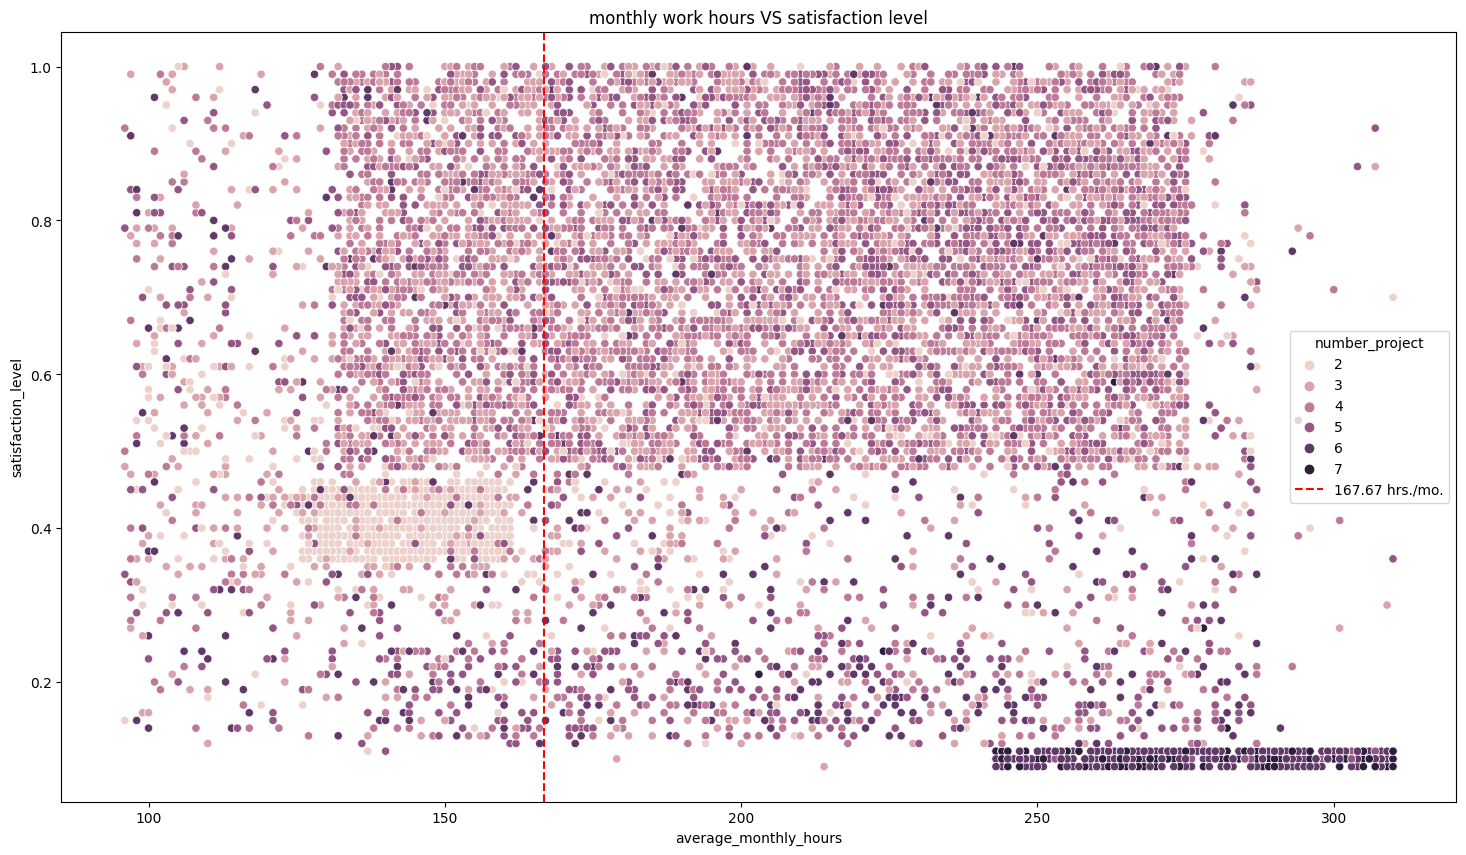

In [17]:
# set figure and exes
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# create scatterplot of satisfaction level VS average monthly work hours of employees and compare by amount of projects they are working on
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='number_project', ax=ax)

# configure the plot
ax.axvline(x=average_work_time_per_month, label='167.67 hrs./mo.', ls='--', color='red')
ax.set_title('monthly work hours VS satisfaction level')
ax.legend(title='number_project')

# display the plots
plt.show()

Here is the same plot from the previous step but now it is divided by number of projects employees were working on.

There are groups of people as we saw earlier on the boxplot. First group are employees with number of projects equal 2 and their satisfaction levels are ~0.4. And the second group of people are those who worked on 7 projects and their satisfaction levels are close to 0.

And the majority of employees who worked on 3-4 projects have satisfaction levels ~0.7.

As i said earlier it seems that perfect amount of projects for employees to work on are equal 3-4. Satisfaction levels in these groups are pretty high.

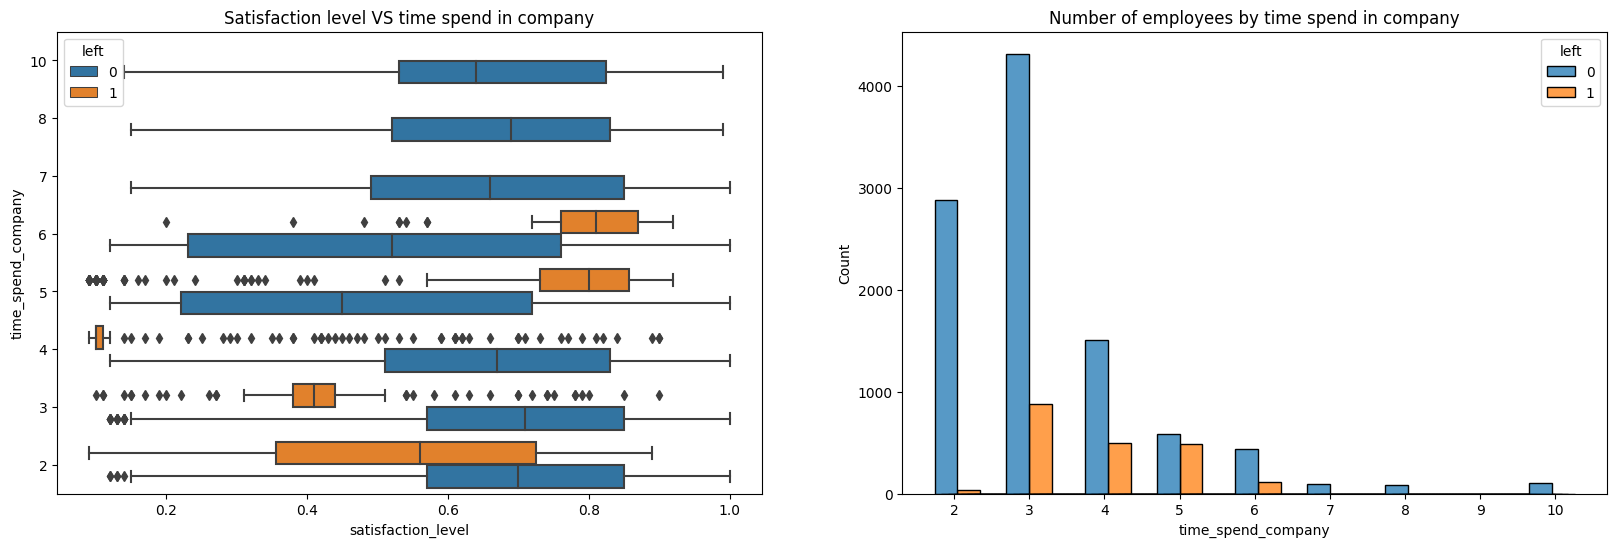

In [18]:
# create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# create boxplot of satisfaction levels VS time spend in company splitted in groups of those who left VS stayed in company
sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', orient='h', hue='left', ax=ax[0])

# configure plot
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level VS time spend in company')

# create histplot displaying number of employees by time spend in company
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', shrink=7, ax=ax[1])

# configure plot
ax[1].set_title('Number of employees by time spend in company')
ax[1].set_xticks(ticks=np.arange(2, 11))

# display plots
plt.show()

Employees fall into two main categories: dissitisfied employees with shorter time spend in company, and very satisfied employees with higher time spend in company.

As amount of year spent in company raise, number of employees who left falls down.
Satisfaction levels of those who stayed in company for a long time are almost equal to newbies.

Three-year and four-year employees who left have unusual low satisfaction levels. It is worth to investigate this question more deeply and even change company policy regarding those groups if it's possible.


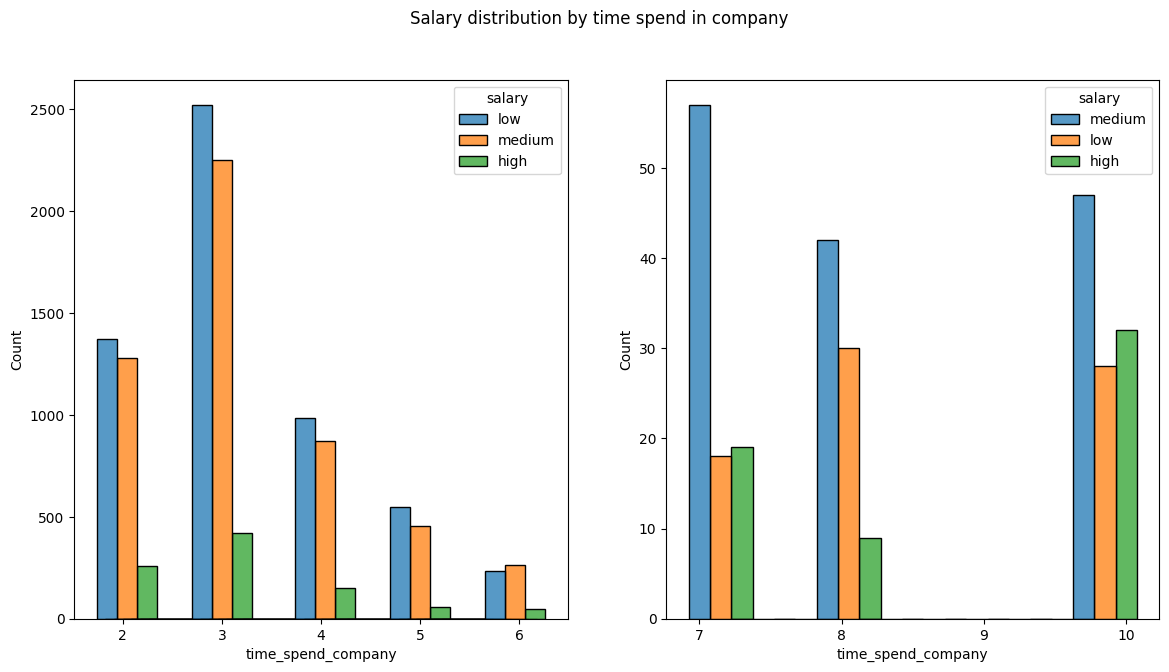

In [19]:
# i decided to divide all employees into two groups, those who have been working for 2-6 years, and those who have been working more than 6 years.
# It is done to exclude probability of skewed visual results because number of employees who worked more than 6 years are significantly less than those who did not.
time_long = df1.query("time_spend_company < 7")
time_short = df1.query("time_spend_company > 6")

# create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# create histplot of number of employees by time spend in company splitted by salary
sns.histplot(data=time_long, x='time_spend_company', ax=ax[0], hue='salary', multiple='dodge', shrink=7)

# create histplot of number of employees by time spend in company splitted by salary
sns.histplot(data=time_short, x='time_spend_company', ax=ax[1], hue='salary', multiple='dodge', shrink=1.5)

# configure plots
ax[1].set_xticks(ticks=np.arange(7, 11, 1))
fig.suptitle('Salary distribution by time spend in company')

# display plots
plt.show()

Recall previous step, i noticed that number of employees who left are falling down as time worked in company raise.
On the current plot we can see possible reason of this statement. The number of employees who left are falling down because salaries of these employees are growing up.


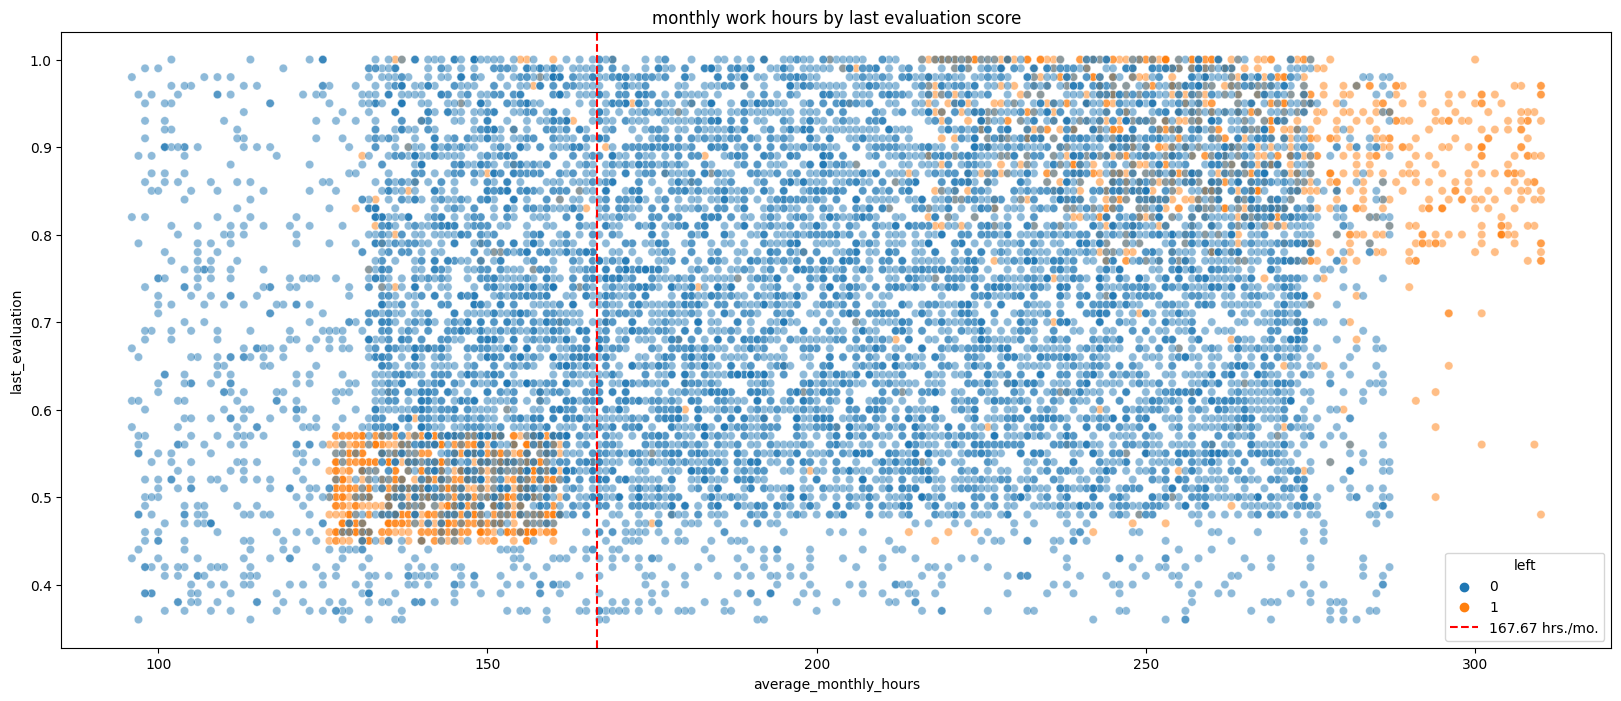

In [20]:
# create figure and axes
plt.figure(figsize=(20, 8))

# create scatterplot of average monthly hours VS last evaluation score employees received

# configure the plot
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=average_work_time_per_month, label='167.67 hrs./mo.', ls='--', color='red')
plt.legend(title='left')
plt.title('monthly work hours by last evaluation score')

# display the plot
plt.show()

There are 2 groups of employees who left: employees with working hours less than normal with low evaluation scores. And overworked employees with high evaluation scores.
I assume there is a correlation between average monthly working hours and evaluation scores.

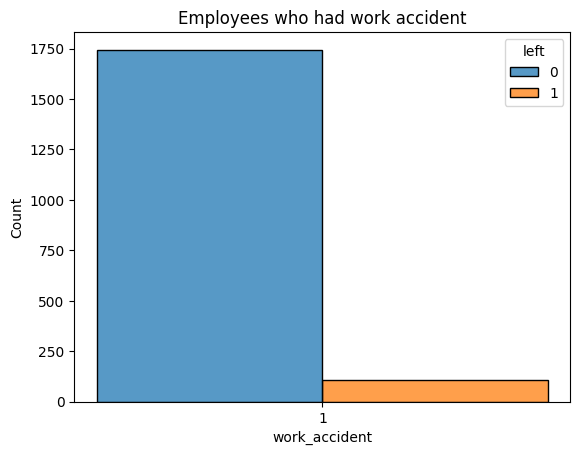

In [21]:
# Choose employees who had an accident at work
temp = df1[df1['work_accident'] == 1]

# Create histplot of employees who experienced work accident
sns.histplot(data=temp, x='work_accident', hue='left', multiple='dodge')

# Configure the plot
plt.title('Employees who had work accident')
plt.xticks(ticks=[1])

# Display the plot
plt.show()

Seems like work accident is not the reason why employees left the company.

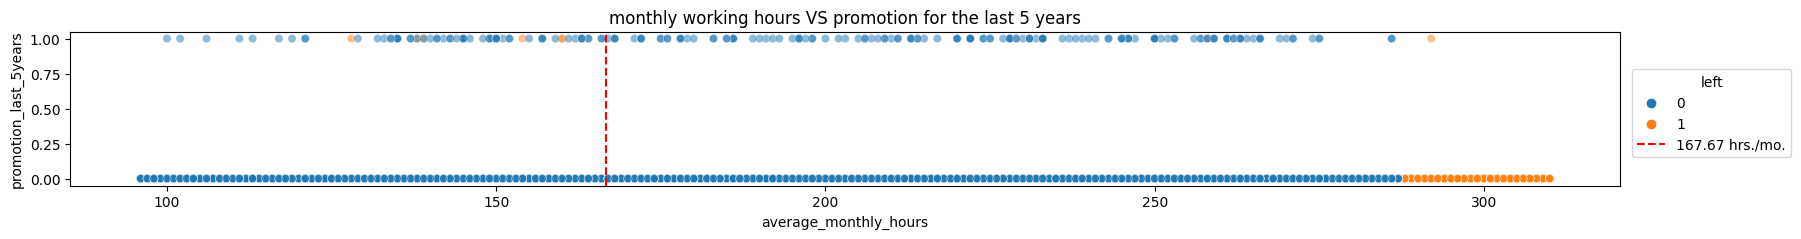

In [22]:
# create figure and axes
plt.figure(figsize=(20, 2))

# create scatterplot of average monthly working hours VS either promotion was received for the last 5 year or not
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)

# configure the plot
plt.title('monthly working hours VS promotion for the last 5 years')
plt.axvline(x=average_work_time_per_month, label='167.67 hrs./mo.', ls='--', color='red')
plt.legend(title='left', bbox_to_anchor=(1.115, 0.8))

# display plot
plt.show()

The plot above shows the following:
* Very few number of employees were promoted in the last 5 years.
* Very few number of employees who worked the most were promoted.
* All of the employees who worked the most left the company.

At this point i assume that there are 2 main reasons why employees who worked the most left the company:
1. They were overworking.
2. Thay did not get any promotion for their efforts even that their efforts were evaluated for ~0.9.

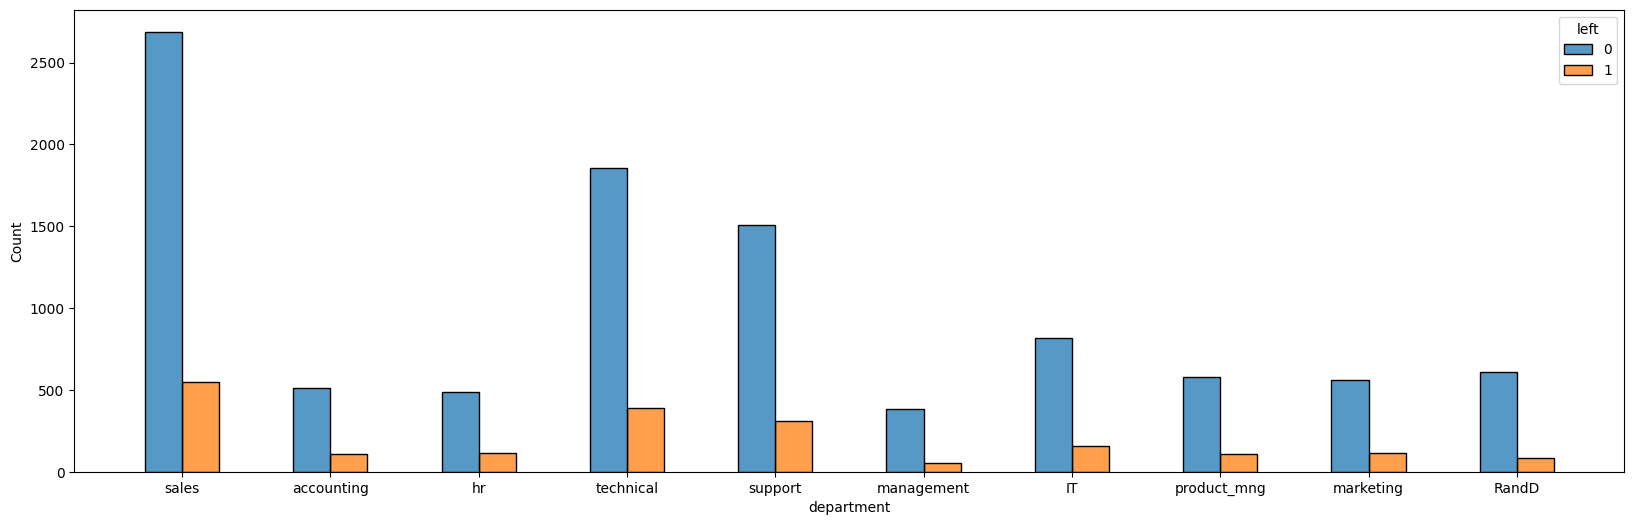

In [23]:
# create figure and axes
plt.figure(figsize=(20, 6))

# create histplot of number of employees distribution splitted by departments
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.5)

# display the plot
plt.show()

Nothing really conspicuous here. Distribution do not significantly differ one from another. 

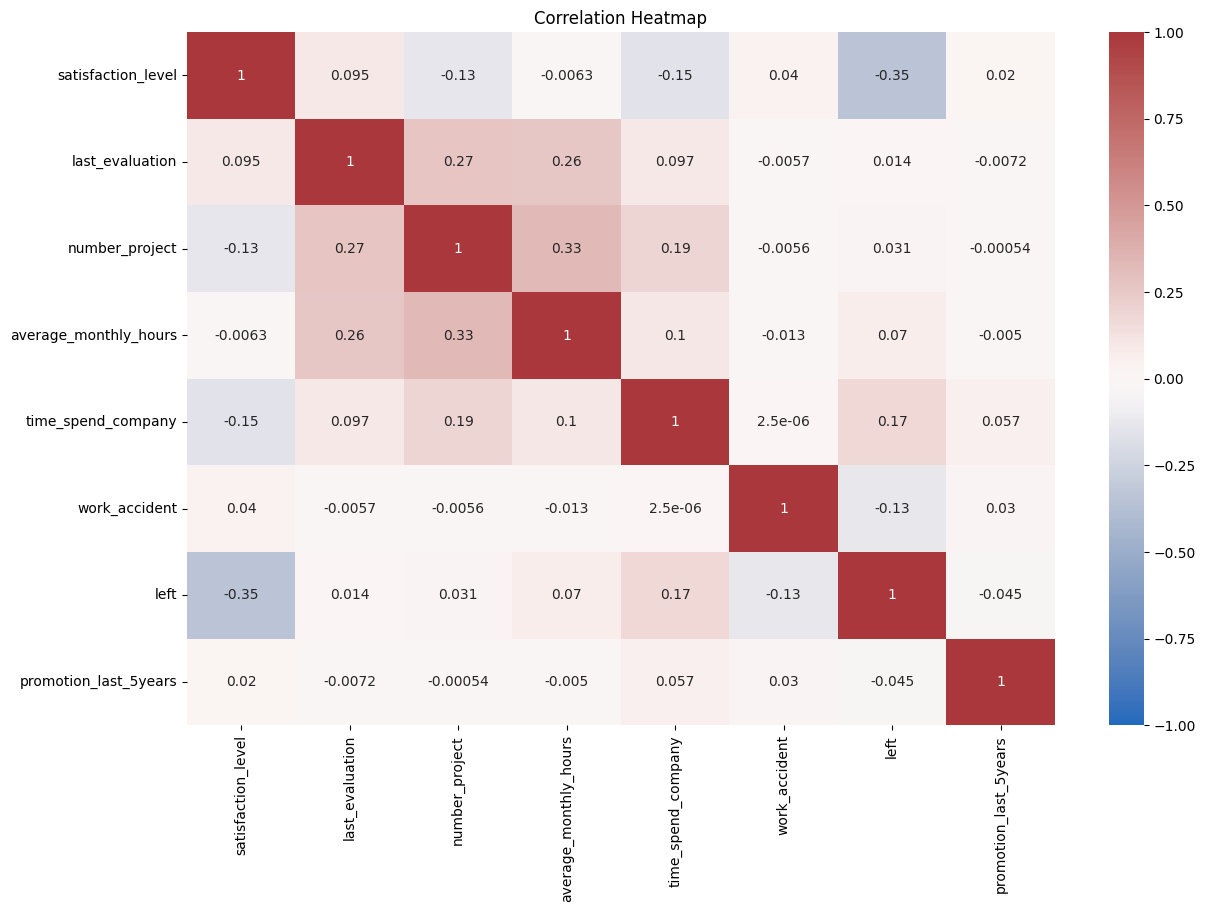

In [24]:
# create figure and axes
plt.figure(figsize=(14, 9))

# create heatmap of correlation within dataset
sns.heatmap(df1.iloc[:, :-2].corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')

# configure the plot
plt.title('Correlation Heatmap')

# display the plot
plt.show()

## Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

## Choosing a regression model to predict wheter employee will leave the company or not

Since my goal is to predict whether employee will leave or not, i am going to deal with categorical variable. So this task involves classification. More specifically, it involves binary classification, because the outcome variable can be either 1 (employee left the company) or 0 (employee did not leave the company). 

Binomial logistic regression suits the task because it involves binary classification.

Before splitting the data into test group and training group i should make some preparations before.

* 'department' is a categorical variable so we can transform it into numeric using dummy method.
* 'salary' is a categorical variable too, but it has a hierarch of salaries, so it is better to convert this variable into levels starting from 0 - low salary, and ending as 2 - high salary.

## Preparations before constructing predicting model 

In [25]:
# making a copy of dataset to make sure i don't alter the main dataset and i can go back to the clean dataset if i made a mistake
df_encoded = df1.copy()
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
# transforming 'department' column using one-hot encoding (dummies)
df_encoded = pd.get_dummies(df_encoded, columns=['department'], drop_first=False)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False


In [27]:
# transforming 'salary' column into numeric categories
# .set_categories(['low', 'medium', 'high']) is used to set a hierarchy so pandas would know which ordinal numbers to assign to each member of hierarchy
df_encoded['salary'] = df_encoded['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


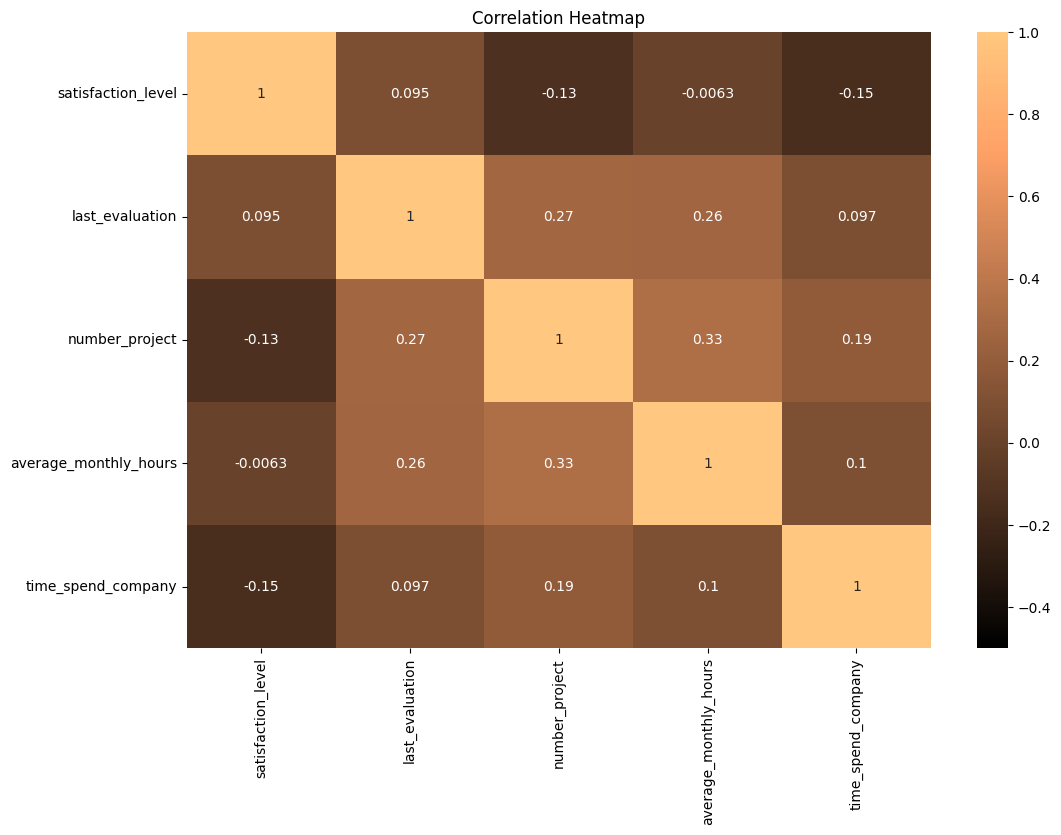

In [28]:
# create figure
plt.figure(figsize=(12,8))

# create heatmap of correlation within the dataset
sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']].corr(), annot=True, cmap='copper', vmin=-0.5, vmax=1)

# configure the plot
plt.title('Correlation Heatmap')

# display the plot
plt.show()

Since the logistic regression is sensitive to outliers it would be great to get rid of them

In [29]:
df_encoded.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000


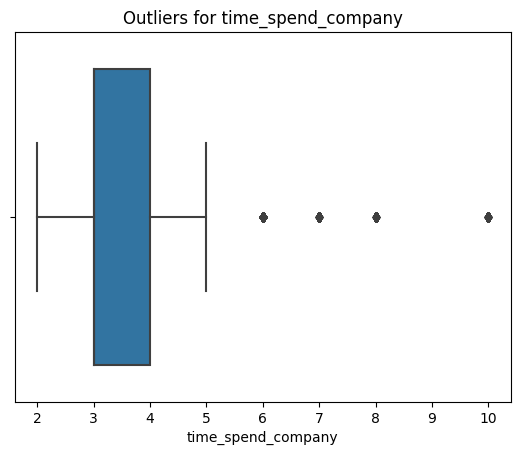

In [30]:
# i assume that there are outliers in the 'time_spend_company' column because max value is too high by comparison with percentile25 and percentile75
# since the logistic regression is sensitive to outliers, it would be proper to get rid of them

# create boxplot to explore the outliers in the 'time_spend_company' column
sns.boxplot(x = df_encoded['time_spend_company'])

# configure the plot
plt.title('Outliers for time_spend_company')
plt.xticks(fontsize = 10)

# display the plot
plt.show()

### At this stage i am going to manually find the outliers.

In [31]:
# calculate percentiles 
p25 = df_encoded['time_spend_company'].quantile(0.25)
p75 = df_encoded['time_spend_company'].quantile(0.75)

# calculate interquantile range
iqr = p75 - p25

# find median
middle = df_encoded['time_spend_company'].median()

# calculate upper limit 
upper = p75 + iqr * 1.5

# calculate lower limit
lower = p25 - iqr * 1.5

# display both limits
print('Lower limit: ', lower)
print('Upper limit: ', upper)

# find the outliers
outliers = df_encoded[(df_encoded['time_spend_company'] < lower) | (df_encoded['time_spend_company'] > upper)]

# display amount of outliers found
print("Outliers count: ", len(outliers))

Lower limit:  1.5
Upper limit:  5.5
Outliers count:  824


In [32]:
# get rid of outliers 
prepared = df_encoded[(df_encoded['time_spend_company'] >= lower) | (df_encoded['time_spend_company'] <= upper)]
prepared.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


## Building logistic regression model

In [33]:
prepared.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [34]:
# isolate the outcome variable (variable i am going to predict)
y = prepared['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [35]:
# select features i am going to use 
x = prepared.drop('left', axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [36]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, stratify=y, random_state=42)


In [37]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
4676,0.97,0.79,2,272,2,0,0,1,False,False,False,False,False,False,False,True,False,False
1240,0.43,0.51,2,132,3,0,0,1,False,False,False,False,False,False,False,True,False,False
6104,0.99,0.85,5,261,4,0,0,1,False,True,False,False,False,False,False,False,False,False
11134,0.75,0.85,3,250,6,0,0,1,False,False,False,False,False,False,False,False,False,True
5860,0.90,0.62,5,236,6,0,0,1,False,False,False,False,False,False,False,False,False,True


In [38]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
583,0.44,0.56,2,145,3,0,0,1,False,False,False,False,False,False,False,False,True,False
2645,0.78,0.65,4,207,2,0,0,1,False,False,False,False,False,False,False,False,True,False
10400,0.83,0.53,3,186,4,0,0,1,False,False,False,False,False,False,False,True,False,False
8965,0.93,0.49,3,211,2,0,0,1,False,False,False,False,False,False,False,False,False,True
79,0.39,0.56,2,142,3,0,0,0,False,False,True,False,False,False,False,False,False,False


In [39]:
y_train.head()

4676     0
1240     1
6104     0
11134    0
5860     0
Name: left, dtype: int64

In [40]:
y_test.head()

583      1
2645     0
10400    0
8965     0
79       1
Name: left, dtype: int64

In [41]:
# Construct a logistic regression model and train it on training sets 
logreg = LogisticRegression(random_state=42, max_iter=500).fit(X=x_train, y=y_train)
logreg

LogisticRegression(max_iter=500, random_state=42)

In [42]:
# Use the logistic regression model to get predictions on the test set
y_pred = logreg.predict(x_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

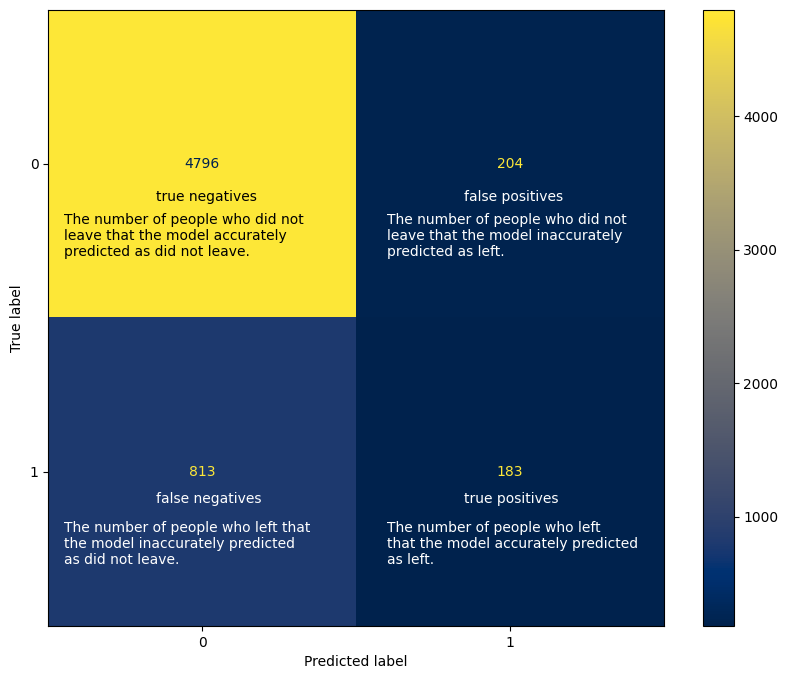

In [43]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=logreg.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=logreg.classes_)

# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot confusion matrix
log_disp.plot(ax=ax, cmap='cividis')

# Configure the plot
ax.text(-0.15, 0.12, 'true negatives', color='black')
ax.text(0.85, 0.12, 'false positives', color='white')
ax.text(-0.15, 1.1, 'false negatives', color='white')
ax.text(0.85, 1.1, 'true positives', color='white')
ax.text(-0.45, 0.3, '''The number of people who did not 
leave that the model accurately 
predicted as did not leave.''')
ax.text(0.6, 0.3, '''The number of people who did not 
leave that the model inaccurately 
predicted as left.''', color='white')
ax.text(-0.45, 1.3, '''The number of people who left that 
the model inaccurately predicted 
as did not leave.''', color='white')
ax.text(0.6, 1.3, '''The number of people who left 
that the model accurately predicted 
as left.''', color='white')

# Display the plot
plt.show()


A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [44]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.90      5000
    Predicted would leave       0.47      0.18      0.26       996

                 accuracy                           0.83      5996
                macro avg       0.66      0.57      0.58      5996
             weighted avg       0.79      0.83      0.80      5996



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

* Precision metric shows the proportion of data points predicted as True that are actually True.
* Recall measures the proportion of data point predicted as True out of all data points that are actually True.
* The F1 score is the harmonic mean of precision and recall, taking into account the performance of both.
* Accuracy measures the proportion of data points that are correctly classified.

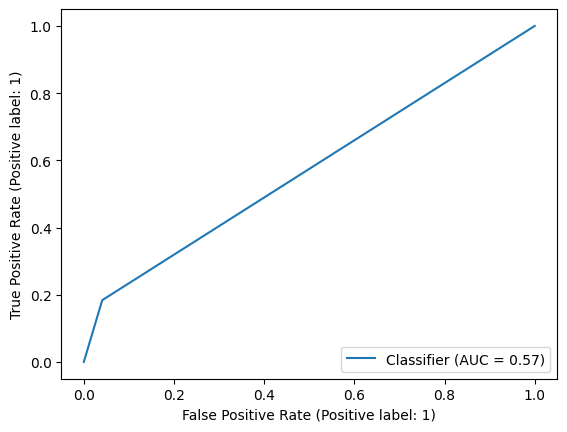

In [45]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()
